**Nama : Muhamad Iqbal** <br>
**Nim : 211351088** <br>
**Kelas : Pagi B**

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhamadiqbalpagib","key":"fb91eb1aba701c289e645a83023e0378"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!kaggle datasets download -d mohamedhanyyy/top-football-leagues-scorers

  0% 0.00/18.4k [00:00<?, ?B/s]
100% 18.4k/18.4k [00:00<00:00, 29.5MB/s]


In [5]:
!mkdir top-football-leagues-scorers
!unzip top-football-leagues-scorers.zip -d top-football-leagues-scorers
!ls top-football-leagues-scorers

Archive:  top-football-leagues-scorers.zip
  inflating: top-football-leagues-scorers/Data.csv  
Data.csv


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
df = pd.read_csv('top-football-leagues-scorers/Data.csv')

In [8]:
df.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  660 non-null    object 
 1   League                   660 non-null    object 
 2   Club                     660 non-null    object 
 3   Player Names             660 non-null    object 
 4   Matches_Played           660 non-null    int64  
 5   Substitution             660 non-null    int64  
 6   Mins                     660 non-null    int64  
 7   Goals                    660 non-null    int64  
 8   xG                       660 non-null    float64
 9   xG Per Avg Match         660 non-null    float64
 10  Shots                    660 non-null    int64  
 11  OnTarget                 660 non-null    int64  
 12  Shots Per Avg Match      660 non-null    float64
 13  On Target Per Avg Match  660 non-null    float64
 14  Year                     6

<Axes: >

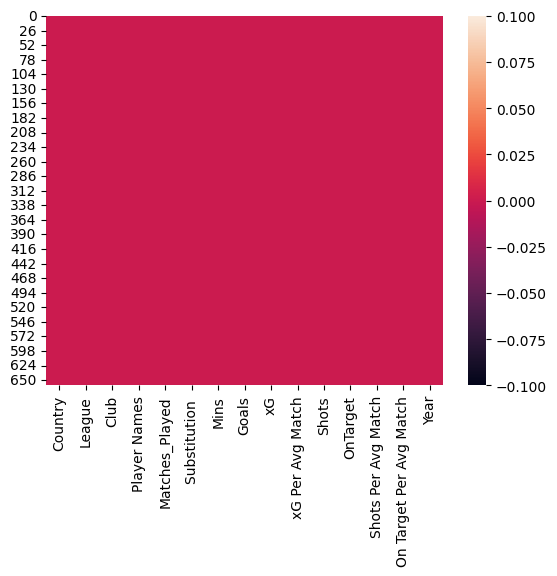

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.describe()

,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,22.371212,3.224242,2071.416667,11.784848,10.089606,0.476167,64.177273,28.365152,2.948015,1.315652,2018.363636
std,9.754658,3.839498,900.595049,5.982454,5.724844,0.192831,34.941622,16.363149,0.914906,0.474239,1.367700
min,2.000000,0.000000,264.000000,2.000000,0.710000,0.070000,5.000000,2.000000,0.800000,0.240000,2016.000000
25%,14.000000,0.000000,1363.500000,8.000000,6.100000,0.340000,37.750000,17.000000,2.335000,0.980000,2017.000000
50%,24.000000,2.000000,2245.500000,11.000000,9.285000,0.435000,62.000000,26.000000,2.845000,1.250000,2019.000000
75%,31.000000,5.000000,2822.000000,14.000000,13.252500,0.570000,86.000000,37.000000,3.382500,1.540000,2019.000000
max,38.000000,26.000000,4177.000000,37.000000,32.540000,1.350000,208.000000,102.000000,7.200000,3.630000,2020.000000


<ipython-input-12-97cdbf7f1862>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

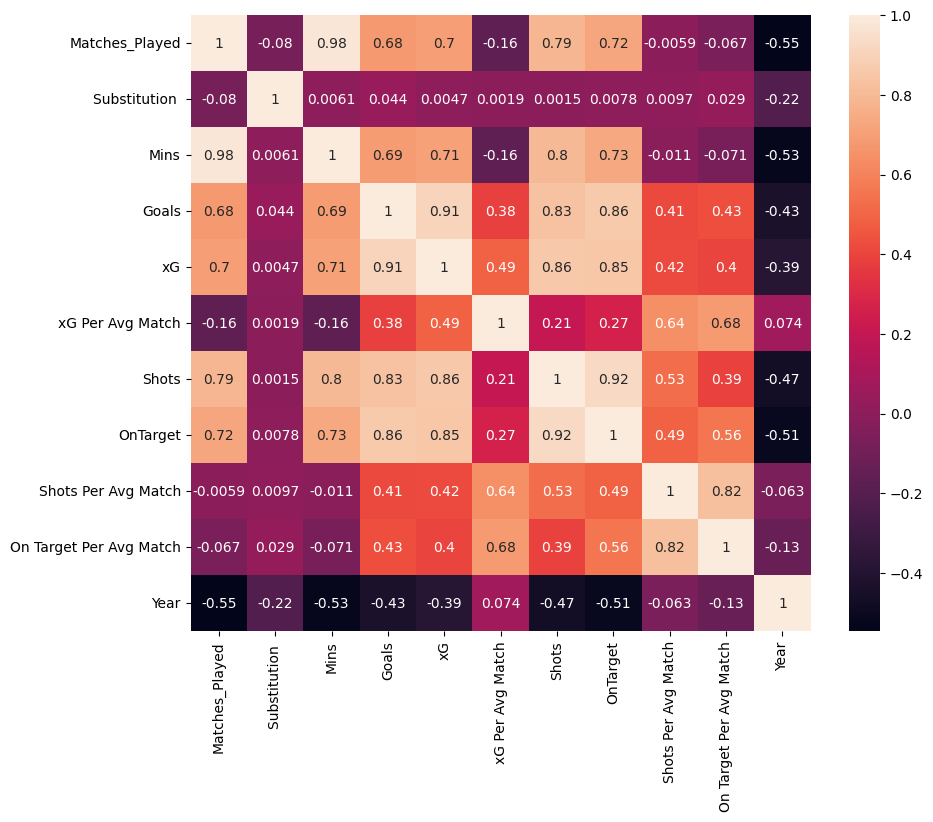

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

#Jumlah gol sesuai nama pemain

In [13]:
PlayerNames = df.groupby('Player Names').count()[['Goals']].sort_values(by='Goals',ascending=True).reset_index()
PlayerNames = PlayerNames.rename(columns={'Goals':'Goals'})

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 129 (\x81) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


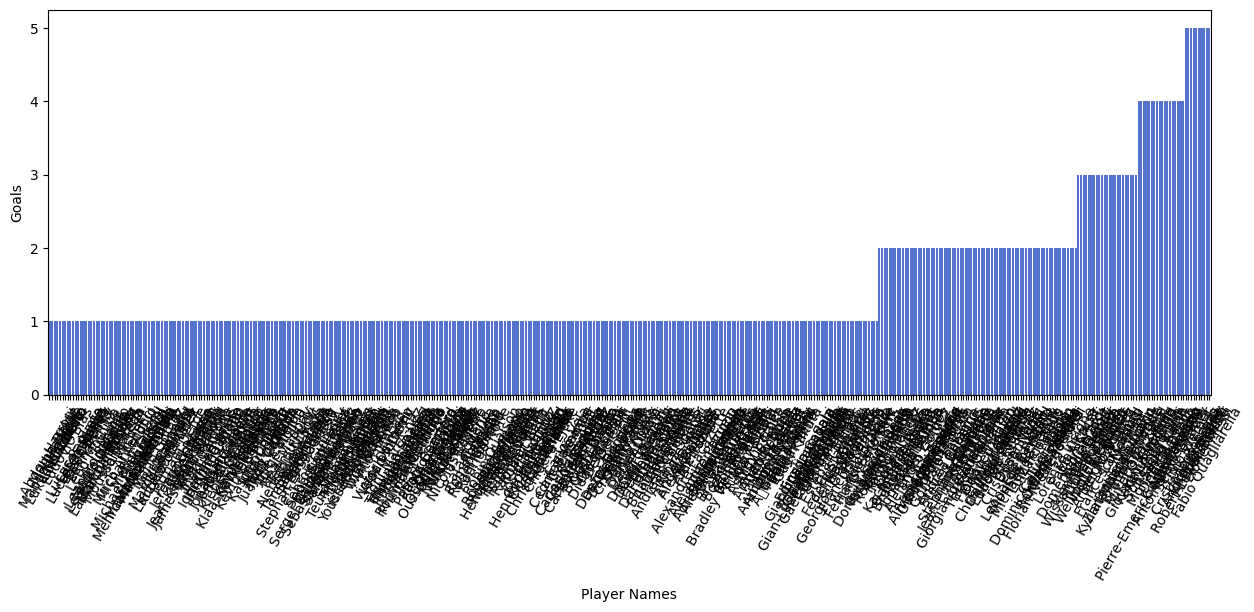

In [16]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=PlayerNames['Player Names'], y=PlayerNames['Goals'], color='royalblue')
plt.xticks(rotation=60)

#Jumlah Pertandingan

In [35]:
OnTarget= df.groupby('OnTarget').count()[['Matches_Played']].sort_values (by='Matches_Played').reset_index()
OnTarget= OnTarget.rename(columns={'Matches_Played':'Matches_Played'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]),
 [Text(0, 0, '2'),
  Text(1, 0, '3'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, '6'),
  Text(5, 0, '7'),
  Text(6, 0, '8'),
  Text(7, 0, '9'),
  Text(8, 0, '10'),
  Text(9, 0, '11'),
  Text(10, 0, '12'),
  Text(11, 0, '13'),
  Text(12, 0, '14'),
  Text(13, 0, '15'),
  Text(14, 0, '16'),
  Text(15, 0, '17'),
  Text(16, 0, '18'),
  Text(17, 0, '19'),
  Text(18, 0, '20'),
  Text(19, 0, '21'),
  Text(20, 0, '22'),
  Text(21, 0, '23'),
  Text(22, 0, '24'),
  Text(23, 0, '25'),
  Text(24, 0, '26'),
  Text(25, 0, '27'),
  Text(26, 0, '28'),
  Text(27, 0, '29'),
  Text(28, 0, '30'),
  Text(29, 0, '31'),
  Text(30, 0, '32'),
  Text(31

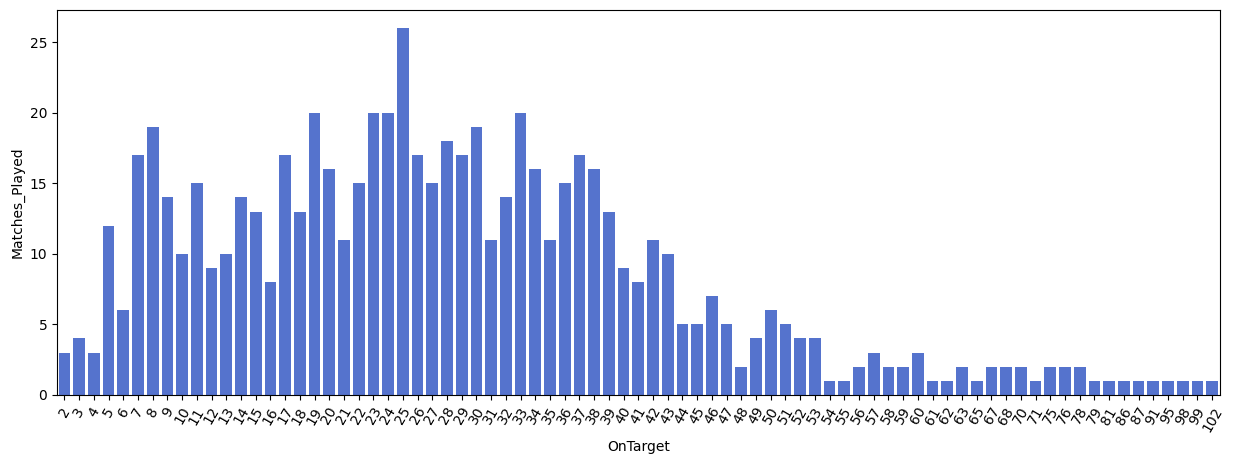

In [36]:
plt.figure(figsize=(15,5))
sns.barplot(x= OnTarget['OnTarget'], y= OnTarget['Matches_Played'], color='royalblue')
plt.xticks(rotation=60)

<ipython-input-37-3f07841c3f05>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Matches_Played'])


<Axes: xlabel='Matches_Played', ylabel='Density'>

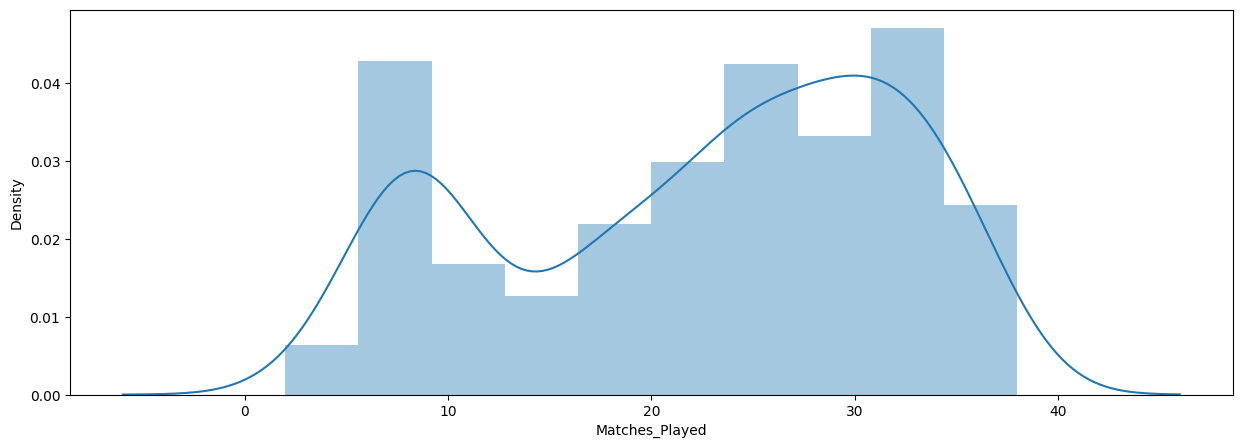

In [37]:
plt.figure(figsize=(15,5))
sns.distplot(df['Matches_Played'])

<ipython-input-38-743cca3d8e3e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Goals'])


<Axes: xlabel='Goals', ylabel='Density'>

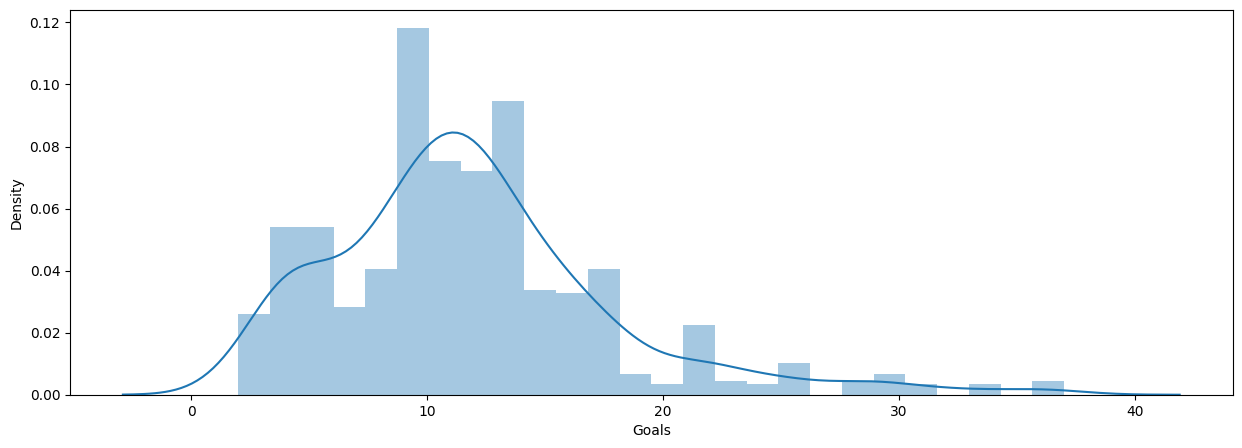

In [38]:
plt.figure(figsize=(15,5))
sns.distplot(df['Goals'])

In [39]:
feature = ['Mins',	'Goals',	'xG',	'xG Per Avg Match',	'Shots',	'OnTarget',	'Shots Per Avg Match',	'On Target Per Avg Match',	'Year']
x = df[feature]
y = df['Matches_Played']
x.shape, y.shape

((660, 9), (660,))

In [40]:
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(165,)

In [41]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [42]:
score = lr.score(X_test, y_test)
print('akurasi model regesi linier =', score)

akurasi model regesi linier = 0.9748447143010328


In [44]:
input_data = np.array([[4000, 888, 998, 88, 987, 456, 432, 78, 2020]])
prediction = lr.predict(input_data)
print('Rata-rata gol yang dihasilkan :', prediction)

Rata-rata gol yang dihasilkan : [8.9528358]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [45]:
import pickle
filename = 'rata-rata_gol.sav'
pickle.dump(lr,open(filename,'wb'))